# 1번

### (1)

In [1]:
import torch
import numpy as np

In [3]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [5]:
x_ones = torch.ones_like(x_data)
print(f'Ones Tensor: \n {x_ones} \n')
x_rand = torch.rand_like(x_data,dtype=torch.float)
print(f'Random Tensor: \n {x_rand} \n')

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3264, 0.1621],
        [0.1849, 0.0373]]) 



In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f'Random Tensor: \n {rand_tensor} \n')
print(f'Ones Tensor: \n {ones_tensor} \n')
print(f'Zeros Tensor: \n {zeros_tensor} \n')

Random Tensor: 
 tensor([[0.5190, 0.1579, 0.5466],
        [0.9668, 0.2596, 0.5950]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [7]:
tensor = torch.rand(3,4)
print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [9]:
tensor = torch.ones(4,4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [11]:
print(f'tensor.mul(tensor) \n {tensor.mul(tensor)} \n')
print(f'tensor * tensor \n {tensor*tensor}')

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
print(f'tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n')
print(f'tensor @ tensor.T \n {tensor @ tensor.T}')

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [13]:
print(tensor, '\n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [14]:
t = torch.ones(5)
print(f't: {t}')
n = t.numpy()
print(f'n: {n}')

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [15]:
t.add_(1)
print(f't: {t}')
print(f'n: {n}')

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [16]:
n = np.ones(5)
t = torch.from_numpy(n)

In [17]:
np.add(n,1,out=n)
print(f't: {t}')
print(f'n: {n}')

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


------------------------

In [18]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\bhfux/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [19]:
prediction = model(data)

In [20]:
loss = (prediction - labels).sum()
loss.backward()

In [21]:
optim = torch.optim.SGD(model.parameters(),lr=1e-2,momentum=0.9)

In [22]:
optim.step()

In [23]:
import torch
a = torch.tensor([2.,3.],requires_grad=True)
b = torch.tensor([6.,4.],requires_grad=True)

In [24]:
Q = 3*a**3 - b**2

In [26]:
external_grad = torch.tensor([1.,1.])
Q.backward(gradient=external_grad)

In [27]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [29]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand((5,5),requires_grad=True)
a = x+y
print(f"Does 'a' require gradients? : {a.requires_grad}")
b = x+z
print(f"Does 'b' require gradients? : {b.requires_grad}")

Does 'a' require gradients? : False
Does 'b' require gradients? : True


In [30]:
from torch import nn, optim
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

In [31]:
model.fc = nn.Linear(512,10)

In [32]:
optimizer = optim.SGD(model.parameters(), lr=1e-2,momentum=0.9)

### (2)

In [82]:
torch.rand()

TypeError: rand() received an invalid combination of arguments - got (), but expected one of:
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [ ]:
torch.zeros()

In [ ]:
torch.tensor()

In [ ]:
torch.from_numpy()

In [ ]:
torch.as_tensor()

In [ ]:
torch.cat()

In [ ]:
torch.stack()

In [ ]:
torch.eye()

In [ ]:
requires_grad=True

In [ ]:
torch.autograd.backward()

In [ ]:
grad_outputs

In [ ]:
torch.norm()

In [ ]:
torch.no_grad()

In [ ]:
torch.Tensor.detach()

### (3)

In [33]:
x = torch.rand(5,4)
x

tensor([[0.5153, 0.3073, 0.1048, 0.4442],
        [0.6861, 0.0112, 0.7983, 0.5637],
        [0.2198, 0.4055, 0.8145, 0.0699],
        [0.6258, 0.0925, 0.4199, 0.3237],
        [0.3780, 0.0193, 0.2142, 0.0856]])

In [34]:
x.shape

torch.Size([5, 4])

In [36]:
x[:,2]

tensor([0.1048, 0.7983, 0.8145, 0.4199, 0.2142])

In [39]:
x.view(2,10)

tensor([[0.5153, 0.3073, 0.1048, 0.4442, 0.6861, 0.0112, 0.7983, 0.5637, 0.2198,
         0.4055],
        [0.8145, 0.0699, 0.6258, 0.0925, 0.4199, 0.3237, 0.3780, 0.0193, 0.2142,
         0.0856]])

In [41]:
x = x.to('cuda')

### (4)

In [107]:
pred_y = [0.57,0.05,0.14,0.10,0.14]
y = [1,0,0,0,0]

import numpy as np

def cross_entropy_loss(y,pred_y):
    delta = 1e-7
    result = -np.sum(pred_y*np.log(pred_y+delta))
    return result

cross_entropy_loss(np.array(y),np.array(pred_y))

1.2509640061092462

In [110]:
import torch
import torch.nn as nn

pred_y = torch.Tensor([[0.57,0.05,0.14,0.10,0.14]])
y = torch.Tensor([[1,0,0,0,0]])
y = torch.argmax(y,dim=1)

loss_func = nn.CrossEntropyLoss()
loss_func(pred_y,y)

tensor(1.2586)

# 2번

### (1)

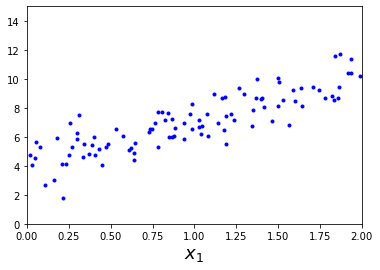

In [43]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.axis([0,2,0,15])
plt.show()

### (2)

In [45]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06075555],
       [3.04684569]])

### (3)

In [47]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.06075555],
       [10.15444694]])

### (4)

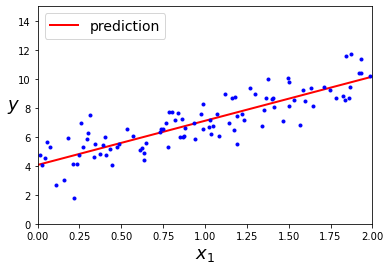

In [50]:
plt.plot(X_new,y_predict,'r-',linewidth=2,label='prediction')
plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.legend(loc='upper left',fontsize=14)
plt.axis([0,2,0,15])
plt.show()

### (5)

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)

[4.06075555] [[3.04684569]]


### (6)

In [53]:
lin_reg.predict(X_new)

array([[ 4.06075555],
       [10.15444694]])

### (7)

In [54]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.06075555],
       [3.04684569]])

### (8)

In [55]:
np.linalg.pinv(X_b).dot(y)

array([[4.06075555],
       [3.04684569]])

### (9)

In [56]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.06075555],
       [3.04684569]])

### (10)

In [57]:
X_new_b.dot(theta)

array([[ 4.06075555],
       [10.15444694]])

### (11)

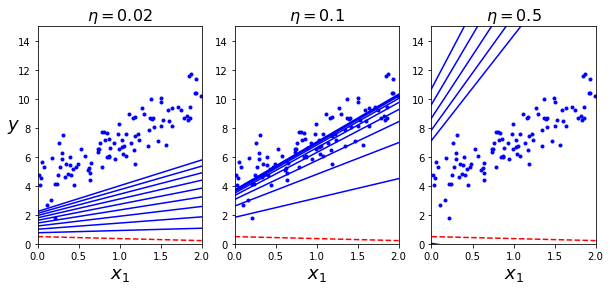

In [59]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new,y_predict,style)
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta *gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$',fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r'$\eta = {}$'.format(eta),fontsize=16)
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta=0.5)
plt.show()

### (12)

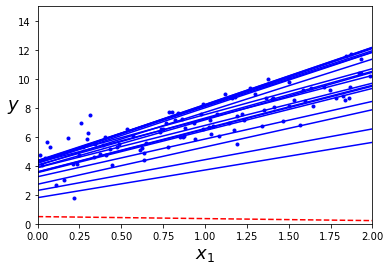

In [60]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i <20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

### (13)

In [61]:
theta

array([[4.00749171],
       [3.02911073]])

### (14)

In [62]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

### (15)

In [63]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.01156184] [3.03770296]


### (16)

In [64]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)
t0, t1 = 200,1000
def learning_schedule(t):
    return t0/(t+t1)
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta-eta*gradients
        theta_path_mgd.append(theta)
print(theta)

[[4.05040239]
 [3.0475958 ]]


### (17)

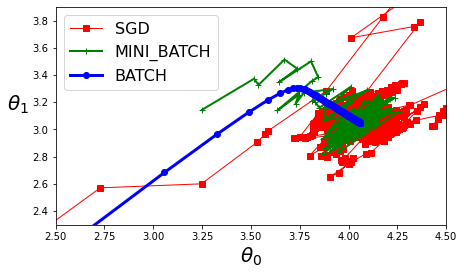

In [66]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',linewidth=1,label='SGD')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',linewidth=2,label='MINI_BATCH')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',linewidth=3,label='BATCH')
plt.legend(loc='upper left',fontsize=16)
plt.xlabel(r'$\theta_0$',fontsize=20)
plt.ylabel(r'$\theta_1$    ',fontsize=20,rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()

# 3번

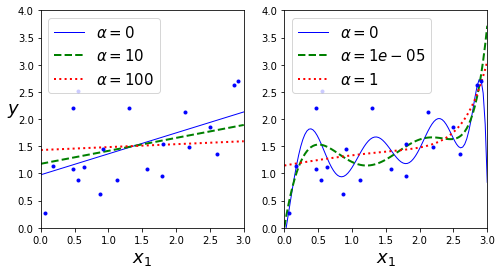

In [73]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1+0.5*X+np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)
def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha, style in zip(alphas,('b-','g--','r:')):
        model = model_class(alpha,**model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                            ('std_scaler',StandardScaler()),
                            ('regul_reg',model),])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label=r'$\alpha = {}$'.format(alpha))
    plt.plot(X,y,'b.',linewidth=3)
    plt.legend(loc='upper left',fontsize=15)
    plt.xlabel('$x_1$',fontsize=18)
    plt.axis([0,3,0,4])
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
plt.show()

# 4번

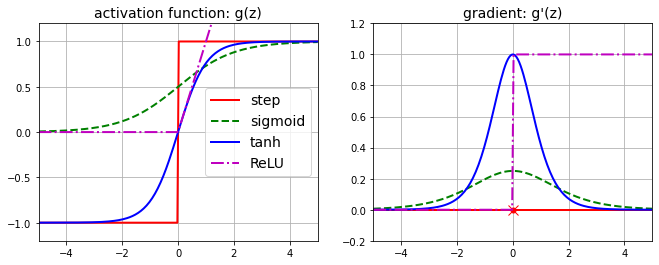

In [80]:
from __future__ import division, print_function, unicode_literals

import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f,z,eps=0.000001):
    return (f(z+eps)-f(z-eps))/(2*eps)

z = np.linspace(-5,5,200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z,np.sign(z),'r-',linewidth=2,label='step')
plt.plot(z,logit(z),'g--',linewidth=2,label='sigmoid')
plt.plot(z,np.tanh(z),'b-',linewidth=2,label='tanh')
plt.plot(z,relu(z),'m-.',linewidth=2,label='ReLU')
plt.grid(True)
plt.legend(loc='center right',fontsize=14)
plt.title('activation function: g(z)',fontsize=14)
plt.axis([-5,5,-1.2,1.2])

plt.subplot(122)
plt.plot(z,derivative(np.sign,z),'r-',linewidth=2,label='step')
plt.plot(0,0,'ro',markersize=5)
plt.plot(0,0,'rx',markersize=10)
plt.plot(z,derivative(logit,z),'g--',linewidth=2,label='sigmoid')
plt.plot(z,derivative(np.tanh,z),'b-',linewidth=2,label='tanh')
plt.plot(z,derivative(relu,z),'m-.',linewidth=2,label='ReLU')
plt.grid(True)
plt.title("gradient: g'(z)",fontsize=14)
plt.axis([-5,5,-0.2,1.2])
plt.show()

# 8번

### (4)